No contours found for C:\Users\User\Desktop\IP\Project_DigitalDynamos\images\day1_e_side.jpg
Measured height for C:\Users\User\Desktop\IP\Project_DigitalDynamos\images\day2_e_side.jpg: 158 pixels
No contours found for C:\Users\User\Desktop\IP\Project_DigitalDynamos\images\day3_e_side.jpg
No contours found for C:\Users\User\Desktop\IP\Project_DigitalDynamos\images\day4_e_side.jpg
Measured height for C:\Users\User\Desktop\IP\Project_DigitalDynamos\images\day5_e_side.jpg: 252 pixels
Measured height for C:\Users\User\Desktop\IP\Project_DigitalDynamos\images\day6_e_side.jpg: 294 pixels
Measured height for C:\Users\User\Desktop\IP\Project_DigitalDynamos\images\day7_e_side.jpg: 180 pixels
File not found: C:\Users\User\Desktop\IP\Project_DigitalDynamos\images\day8_e_side.jpg
Collected Heights: [0, 158, 0, 0, 252, 294, 180]
Chart saved as plant_growth_chart.png


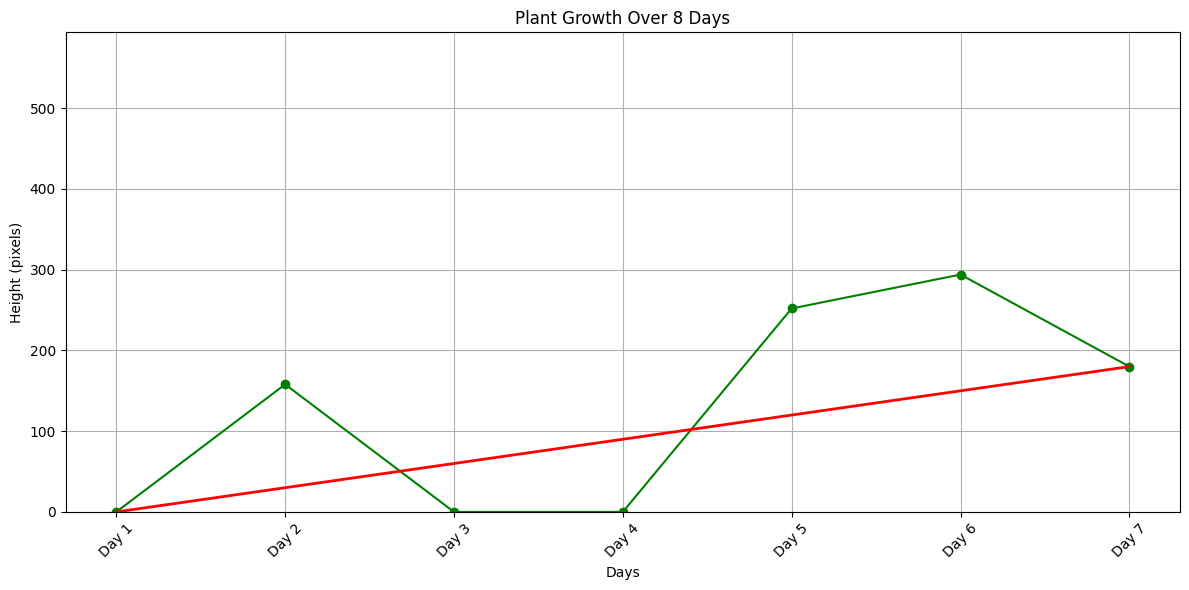

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def enhance_image(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert BGR to HSV
    lower_color = np.array([40, 40, 40])
    upper_color = np.array([100, 255, 255])
    
    mask = cv2.inRange(hsv, lower_color, upper_color)
    blurred_mask = cv2.GaussianBlur(mask, (5, 5), 0)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    closed_mask = cv2.morphologyEx(blurred_mask, cv2.MORPH_CLOSE, kernel)
    opened_mask = cv2.morphologyEx(closed_mask, cv2.MORPH_OPEN, kernel)
    
    return opened_mask

def measure_plant_height(image_path, output_folder):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image: {image_path}")
        return 0
    
    mask = enhance_image(img)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]
        if filtered_contours:
            largest_contour = max(filtered_contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(largest_contour)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            output_filename = os.path.join(output_folder, os.path.basename(image_path))
            cv2.imwrite(output_filename, img)
            
            print(f"Measured height for {image_path}: {h} pixels")  # Debugging statement
            return h  # Return the plant height in pixels
    
    print(f"No contours found for {image_path}")
    return 0 

def main():
    project_folder = os.getcwd()  # Fix: Get current working directory
    image_folder = os.path.join(project_folder, 'images')
    output_folder = os.path.join(project_folder, 'detectedContours')
    os.makedirs(output_folder, exist_ok=True)
    
    heights = []
    x_labels = []
    
    for day in range(1, 9):  # Loop through days 1 to 8
        filename = f'day{day}_e_side.jpg'  # Only side images
        img_path = os.path.join(image_folder, filename)
        
        if os.path.exists(img_path):
            height = measure_plant_height(img_path, output_folder)
            heights.append(height)
            x_labels.append(f'Day {day}')
        else:
            print(f"File not found: {img_path}")
    
    print(f"Collected Heights: {heights}")  # Debugging statement
    if heights:
        plot_growth(x_labels, heights)

def plot_growth(x_labels, heights):
    x_axis = list(range(len(x_labels)))
    
    plt.figure(figsize=(12, 6))
    plt.plot(x_axis, heights, marker='o', linestyle='-', color='green')
    plt.title('Plant Growth Over 8 Days')
    plt.xlabel('Days')
    plt.ylabel('Height (pixels)')
    plt.xticks(x_axis, x_labels, rotation=45)
    
    max_height = max(heights) + 300 if heights else 750
    plt.ylim(0, max_height)
    plt.grid()
    
    if heights:
        plt.plot([x_axis[0], x_axis[-1]], [heights[0], heights[-1]], color='red', linestyle='-', linewidth=2)
    
    plt.tight_layout()
    plt.savefig('plant_growth_chart.png')  # Save the plot as an image
    print("Chart saved as plant_growth_chart.png")  # Debugging statement
    plt.show()

if __name__ == "__main__":
    main()
